# EDA short version

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dfLinks = pd.read_csv('data/links.csv',nrows=5)
dfLinks

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [3]:
del dfLinks

In [4]:
dfMovies = pd.read_csv('data/movies.csv',nrows=5)
dfMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
dfRatings = pd.read_csv('data/ratings.csv', nrows=5)
dfRatings

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [6]:
dfTags = pd.read_csv('data/tags.csv',nrows=5)
dfTags

,userId,movieId,tag,timestamp
0,19,2324,bittersweet,1428651158
1,19,2324,holocaust,1428651112
2,19,2324,World War II,1428651118
3,23,7075,hilarious,1378675786
4,23,7075,Underrated,1378675786


Cleaning and ordering data

In [7]:
dfMovies = pd.read_csv('data/movies.csv')
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [8]:
dfMovies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
34203,151697,Grand Slam (1967),Thriller
34204,151701,Bloodmoney (2010),(no genres listed)
34205,151703,The Butterfly Circus (2009),Drama
34206,151709,Zero (2015),Drama|Sci-Fi


In [9]:
df = dfMovies['title'].str.split(r'(\(\d\d\d\d\)$)',expand=True) \
.rename(columns={0: 'title', 1: 'year'}) \
.drop(columns=[2]) \
.dropna()

df['year'] = df['year'].str.strip('()')

dfMovies = pd.concat([df[['title', 'year']], dfMovies[['movieId', 'genres']]], axis=1) \
.rename(columns={'movieId': 'movie_id'}) \
.set_index('movie_id')


dfMovies['genres'] = dfMovies['genres'].str.lower() \
.str.split('|') \
.apply(lambda x: set(x).remove('(no genres listed)') if '(no genres listed)' in x else set(x))

dfMovies = dfMovies.dropna(subset=['title', 'year'])
dfMovies['year'] = dfMovies['year'].astype(int)
dfMovies['title'] = dfMovies['title'].str.strip().str.lower()

dfMovies

,title,year,genres
movie_id,,,
1,toy story,1995,"{comedy, animation, fantasy, adventure, children}"
2,jumanji,1995,"{children, fantasy, adventure}"
3,grumpier old men,1995,"{romance, comedy}"
4,waiting to exhale,1995,"{drama, romance, comedy}"
5,father of the bride part ii,1995,{comedy}
...,...,...,...
151697,grand slam,1967,{thriller}
151701,bloodmoney,2010,None
151703,the butterfly circus,2009,{drama}


In [10]:
dfMovies['title'].iloc[0]

'toy story'

In [11]:
dfRatings = pd.read_csv('data/ratings.csv', usecols=['movieId', 'userId', 'rating'])
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 523.8 MB


In [12]:
dfRatings = dfRatings.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})

# change the data formats to save resources - decrease memory usage
dfRatings['user_id'] = dfRatings['user_id'].astype(np.uint32)
dfRatings['movie_id'] = dfRatings['movie_id'].astype(np.uint32)
dfRatings['rating'] = dfRatings['rating'].astype(np.float16)

dfRatings = dfRatings.drop_duplicates(subset=('user_id', 'movie_id'))
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   uint32 
 1   movie_id  uint32 
 2   rating    float16
dtypes: float16(1), uint32(2)
memory usage: 392.8 MB


In [13]:
# cleaning and data conversion to save memory of the tags source
dfTags = pd.read_csv('data/tags.csv', usecols=['userId', 'movieId', 'tag']) \
.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})
dfTags['movie_id'] = dfTags['movie_id'].astype(np.uint32)
dfTags['user_id'] = dfTags['user_id'].astype(np.uint32)
dfTags['tag'] = dfTags['tag'].str.lower().str.strip()
dfTags = dfTags.dropna().drop_duplicates()

dfTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586978 entries, 0 to 586993
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   586978 non-null  uint32
 1   movie_id  586978 non-null  uint32
 2   tag       586978 non-null  object
dtypes: object(1), uint32(2)
memory usage: 13.4+ MB


array([[<AxesSubplot:title={'center':'movie_id'}>]], dtype=object)

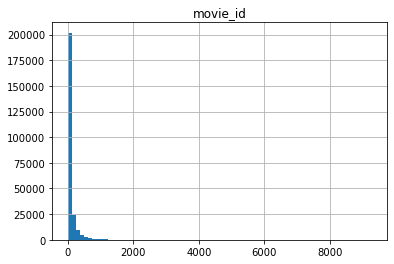

In [14]:
# data evalution from model creation perpsectivie
# rating distribution
dfRatings[['movie_id','user_id']].groupby(by='user_id').count().hist(bins=75)

array([[<AxesSubplot:title={'center':'user_id'}>]], dtype=object)

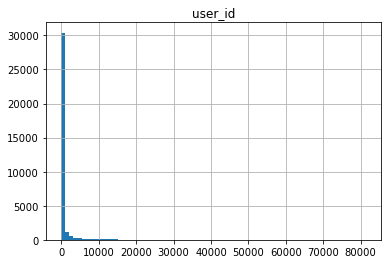

In [15]:
dfRatings[['movie_id','user_id']].groupby(by='movie_id').count().hist(bins=75)

In [18]:
# lets see the most popular movies
dfRatings[['movie_id', 'user_id']].groupby(by='movie_id') \
.count() \
.rename(columns={'user_id': 'views'}) \
.sort_values(by='views', ascending=False) \
.merge(dfMovies, left_on='movie_id', right_index=True) \
.head(15)

,views,title,year,genres
movie_id,,,,
356,81296,forrest gump,1994,"{war, drama, romance, comedy}"
296,79091,pulp fiction,1994,"{crime, drama, thriller, comedy}"
318,77887,"shawshank redemption, the",1994,"{drama, crime}"
593,76271,"silence of the lambs, the",1991,"{thriller, horror, crime}"
480,69545,jurassic park,1993,"{sci-fi, adventure, action, thriller}"
260,67092,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
2571,64830,"matrix, the",1999,"{sci-fi, action, thriller}"
110,61267,braveheart,1995,"{war, drama, action}"
1,60424,toy story,1995,"{comedy, animation, fantasy, adventure, children}"


In [19]:
# how the movies were rated: the best
dfRatings[['movie_id', 'rating']].groupby(by='movie_id') \
.mean() \
.rename(columns={'rating': 'average_rating'}) \
.sort_values(by='average_rating', ascending=False) \
.merge(dfMovies, left_on='movie_id', right_index=True) \
.head(15)

,average_rating,title,year,genres
movie_id,,,,
140431,5.0,the biscuit eater,1940,None
137052,5.0,a job to kill for,2006,"{drama, thriller}"
137048,5.0,perfect child,2007,{drama}
146433,5.0,big love,2012,"{drama, romance, thriller}"
137046,5.0,the perfect assistant,2008,"{mystery, thriller, crime}"
106113,5.0,such hawks such hounds,2008,{documentary}
106115,5.0,"story of science, the",2010,{documentary}
137040,5.0,hunger point,2003,{drama}
137038,5.0,the perfect wife,2001,"{drama, thriller}"


In [21]:
# how the movies were rated: the worst
dfRatings[['movie_id', 'rating']].groupby(by='movie_id') \
.mean() \
.rename(columns={'rating': 'average_rating'}) \
.sort_values(by='average_rating', ascending=False) \
.merge(dfMovies, left_on='movie_id', right_index=True) \
.tail(15)

,average_rating,title,year,genres
movie_id,,,,
138576,0.5,brutal,2012,{crime}
79561,0.5,dr. moreau's house of pain,2004,{horror}
128677,0.5,zeder,1983,{horror}
146246,0.5,bhai,1997,None
131688,0.5,girlfriend from hell,1989,"{horror, comedy}"
138442,0.5,noi credevamo,2010,None
133407,0.5,dirty business,2009,{documentary}
135545,0.5,ardennes fury,2014,"{war, action}"
99667,0.5,excuse me for living,2012,"{romance, comedy}"


In [22]:
dfMoviesStats = dfRatings[['movie_id', 'user_id', 'rating']].groupby(by='movie_id') \
.agg({'user_id': 'count', 'rating': 'mean'}) \
.rename(columns={'user_id': 'views_count', 'rating': 'average_rating'}) \
.sort_values(by='views_count', ascending=False) \
.merge(dfMovies, left_on='movie_id', right_index=True) \

dfMoviesStats.head(15)

,views_count,average_rating,title,year,genres
movie_id,,,,,
356,81296,4.046875,forrest gump,1994,"{war, drama, romance, comedy}"
296,79091,4.164062,pulp fiction,1994,"{crime, drama, thriller, comedy}"
318,77887,4.441406,"shawshank redemption, the",1994,"{drama, crime}"
593,76271,4.160156,"silence of the lambs, the",1991,"{thriller, horror, crime}"
480,69545,3.652344,jurassic park,1993,"{sci-fi, adventure, action, thriller}"
260,67092,4.156250,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
2571,64830,4.171875,"matrix, the",1999,"{sci-fi, action, thriller}"
110,61267,4.035156,braveheart,1995,"{war, drama, action}"
1,60424,3.894531,toy story,1995,"{comedy, animation, fantasy, adventure, children}"


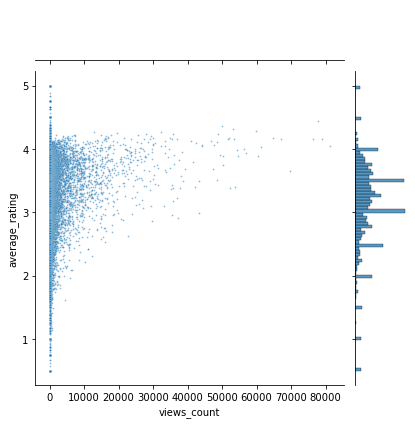

In [23]:
sns.jointplot(data=dfMoviesStats, x='views_count', y='average_rating', alpha=0.5, s=3.0)

In [27]:
# users preference to rate the movies
dfUserCount = pd.DataFrame(dfRatings['user_id'].value_counts()) \
.reset_index() \
.rename(columns={'index': 'user_id', 'user_id': 'count'})

dfUserCount

,user_id,count
0,185430,9281
1,46750,7515
2,204165,7057
3,135877,6015
4,58040,5801
...,...,...
247748,127573,1
247749,180933,1
247750,200783,1
247751,180936,1


In [28]:
len(dfRatings)

22884377

In [32]:
# data set reduction to movies displayed at least 2000 times

MIN_VIEWS_FOR_MOVIES = 2000
movieIds = list(dfMoviesStats[dfMoviesStats['views_count'] > MIN_VIEWS_FOR_MOVIES].index)
print("# movies:", len(movieIds))

# movies: 2217


In [36]:
# same exerciese but with users - limit data size
MIN_RATINGS_FROM_USERS = 1000
userIds = dfUserCount[dfUserCount['count'] > MIN_RATINGS_FROM_USERS]['user_id'].tolist()
print("# users:", len(userIds))

# users: 2109


In [37]:
print(len(dfRatings))
df = dfRatings[dfRatings.reset_index()['movie_id'].isin(movieIds)]
print(len(df))
df = df[df['user_id'].isin(userIds)]
print(len(df))

df = df.reset_index()
df

22884377
18779638
1905979


,index,user_id,movie_id,rating
0,1247,17,1,5.0
1,1248,17,2,3.0
2,1249,17,3,2.0
3,1250,17,4,3.0
4,1251,17,5,4.0
...,...,...,...,...
1905974,22877349,247662,109487,4.0
1905975,22877351,247662,112852,4.0
1905976,22877356,247662,116823,3.0
1905977,22877358,247662,119145,3.5


In [38]:
df['rating'].min()

0.5

In [39]:
df['rating'].max()

5.0

In [42]:
df = df[['user_id', 'movie_id', 'rating']].groupby(by=['movie_id', 'user_id']) \
.mean() \
.reset_index() \
.dropna()
df

,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0
...,...,...,...
1905974,134853,244116,4.5
1905975,134853,244606,3.0
1905976,134853,246481,4.0
1905977,134853,246533,2.5


In [43]:
ddf = pd.DataFrame(df.to_numpy(), columns=['movie_id', 'user_id', 'rating'])
ddf['movie_id'] = ddf['movie_id'].astype(int)
ddf['user_id'] = ddf['user_id'].astype(int)
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905979 entries, 0 to 1905978
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   movie_id  int32  
 1   user_id   int32  
 2   rating    float64
dtypes: float64(1), int32(2)
memory usage: 29.1 MB


In [44]:
Y = ddf.pivot(index='user_id', columns='movie_id', values='rating')
Y

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,5.0,3.0,2.0,3.0,4.0,NaN,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2.5,3.0,NaN,NaN,NaN,3.5,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,4.0,1.5,2.0,NaN,2.5,3.5,3.5,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,0.5,2.5,2.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,1.5,NaN,3.0,4.0,NaN,NaN,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247424,4.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247438,3.5,3.0,NaN,2.5,NaN,3.5,NaN,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247509,4.5,3.5,3.5,NaN,NaN,NaN,NaN,NaN,3.5,4.0,...,3.0,1.5,NaN,NaN,3.0,NaN,1.5,2.5,3.0,3.5


In [46]:
# to present if a specific movie was rated by user
Y > 0

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,True,True,True,True,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
106,True,True,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
373,True,True,True,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
402,False,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
670,True,True,True,False,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247424,True,False,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
247438,True,True,False,True,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
247509,True,True,True,False,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,True,True


In [47]:
# save data to pickle format
dfRatings.to_pickle('data/ratings.pkl')
dfMovies.to_pickle('data/movies.pkl')
ddf.to_pickle('data/user-movie-data-clean.pkl')
Y.to_pickle('data/Y.pkl')

# First recommendation system

In [63]:
import numpy as np
import pandas as pd

In [64]:
dfRatings = pd.read_pickle('data/ratings.pkl')
dfMovies = pd.read_pickle('data/movies.pkl')
Y = pd.read_pickle('data/Y.pkl')

In [65]:
dfRatings.head()

,user_id,movie_id,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


In [66]:
dfMovies.head()

,title,year,genres
movie_id,,,
1,toy story,1995,"{animation, comedy, adventure, fantasy, children}"
2,jumanji,1995,"{adventure, children, fantasy}"
3,grumpier old men,1995,"{romance, comedy}"
4,waiting to exhale,1995,"{drama, romance, comedy}"
5,father of the bride part ii,1995,{comedy}


In [67]:
Y.head()

movie_id,1,2,3,4,5,6,7,9,10,11,...,115617,115713,116797,116823,119145,122882,122886,122892,134130,134853
user_id,,,,,,,,,,,,,,,,,,,,,
17,5.0,3.0,2.0,3.0,4.0,NaN,3.0,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2.5,3.0,NaN,NaN,NaN,3.5,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,4.0,1.5,2.0,NaN,2.5,3.5,3.5,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,0.5,2.5,2.5,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,5.0,4.0,1.5,NaN,3.0,4.0,NaN,NaN,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
title = 'Toy Story'
dfMovies[dfMovies['title'] == title.lower()].index[0]

1

In [69]:
def get_index(Y, df, title):
    if title.lower() in tuple(dfMovies['title']):
        movie_index = dfMovies[dfMovies['title'] == title.lower()].index[0]
        if movie_index in Y.columns:
            return movie_index
        else:
            raise(ValueError(f'Movie index: {movie_index} does not exist'))
    else:
        raise(ValueError(f'Movie: "{title}" not found!'))

In [70]:
# lets see if function works
get_index(Y, dfMovies, 'Jumanji')

2

In [71]:
get_index(Y, dfMovies, 'Forrest Gump')

356

In [72]:
get_index(Y, dfMovies, 'Fake movie title')

ValueError: Movie: "Fake movie title" not found!

In [73]:
movieIndex = get_index(Y, dfMovies, 'Forrest Gump')
Y.corrwith(Y[movieIndex])

movie_id
1         0.226102
2         0.273376
3         0.310216
4         0.128658
5         0.307020
            ...   
122882    0.059550
122886    0.256877
122892    0.238609
134130    0.240300
134853    0.201823
Length: 2217, dtype: float64

In [74]:
# clean the list
Y.corrwith(Y[movieIndex]) \
.dropna() \
.sort_values(ascending=False) \
.head()

movie_id
356     1.000000
110     0.450801
1961    0.441545
590     0.428735
3147    0.426190
dtype: float64

In [76]:
pd.DataFrame(Y.corrwith(Y[movieIndex]) \
.dropna() \
.sort_values(ascending=False) \
.head()) \
.join(dfMovies)

,0,title,year,genres
movie_id,,,,
356,1.000000,forrest gump,1994,"{war, drama, romance, comedy}"
110,0.450801,braveheart,1995,"{war, drama, action}"
1961,0.441545,rain man,1988,{drama}
590,0.428735,dances with wolves,1990,"{western, drama, adventure}"
3147,0.426190,"green mile, the",1999,"{drama, crime}"


In [78]:
def get_recommendation(Y, dfMovies, title, n_suggestions=5):
    movieIndex = get_index(Y, dfMovies, title)
    suggestions = pd.DataFrame(Y.corrwith(Y[movieIndex])) \
    .dropna() \
    .sort_values(by=0, ascending=False) \
    .iloc[1:n_suggestions + 1] \
    .join(dfMovies) \
    .rename(columns={0: 'correlation'})
    
    return suggestions

In [79]:
# lets see is it working
get_recommendation(Y, dfMovies, 'Toy Story', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
3114,0.756428,toy story 2,1999,"{animation, comedy, adventure, fantasy, children}"
78499,0.618795,toy story 3,2010,"{animation, comedy, adventure, fantasy, childr..."
2355,0.575283,"bug's life, a",1998,"{animation, children, adventure, comedy}"
6377,0.562309,finding nemo,2003,"{animation, children, adventure, comedy}"
4886,0.525836,"monsters, inc.",2001,"{animation, comedy, adventure, fantasy, children}"
595,0.516899,beauty and the beast,1991,"{romance, animation, musical, fantasy, childre..."
588,0.515730,aladdin,1992,"{animation, comedy, musical, adventure, children}"


In [80]:
# lets check for other movie
get_recommendation(Y, dfMovies, 'Apollo 13', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
2028,0.451545,saving private ryan,1998,"{war, drama, action}"
3035,0.445475,mister roberts,1955,"{war, drama, comedy}"
33660,0.440269,cinderella man,2005,"{drama, romance}"
2797,0.435442,big,1988,"{fantasy, drama, romance, comedy}"
1608,0.425555,air force one,1997,"{action, thriller}"
3157,0.423442,stuart little,1999,"{children, fantasy, comedy}"
381,0.423400,when a man loves a woman,1994,"{drama, romance}"


In [81]:
get_recommendation(Y, dfMovies, 'Goldeneye', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
1722,0.638308,tomorrow never dies,1997,"{adventure, action, thriller}"
3082,0.597178,"world is not enough, the",1999,"{adventure, action, thriller}"
3639,0.546179,"man with the golden gun, the",1974,"{adventure, action, thriller}"
2989,0.540231,for your eyes only,1981,"{adventure, action, thriller}"
3635,0.526271,"spy who loved me, the",1977,"{adventure, action, thriller}"
2990,0.518172,licence to kill,1989,"{adventure, action, thriller}"
2376,0.515580,"view to a kill, a",1985,"{adventure, action, thriller}"


In [82]:
# and star wars
dfMovies[dfMovies['title'].str.contains('star wars')]

,title,year,genres
movie_id,,,
260,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}"
1196,star wars: episode v - the empire strikes back,1980,"{sci-fi, adventure, action}"
1210,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}"
2628,star wars: episode i - the phantom menace,1999,"{sci-fi, adventure, action}"
5378,star wars: episode ii - attack of the clones,2002,"{imax, adventure, action, sci-fi}"
33493,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}"
61160,star wars: the clone wars,2008,"{sci-fi, adventure, action, animation}"
79006,empire of dreams: the story of the 'star wars'...,2004,{documentary}
100089,star wars uncut: director's cut,2012,"{action, animation, comedy, western, sci-fi}"


In [83]:
get_recommendation(Y, dfMovies, 'star wars: episode i - the phantom menace', n_suggestions=7)

,correlation,title,year,genres
movie_id,,,,
5378,0.756155,star wars: episode ii - attack of the clones,2002,"{imax, adventure, action, sci-fi}"
33493,0.652611,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}"
59615,0.469613,indiana jones and the kingdom of the crystal s...,2008,"{sci-fi, adventure, action, comedy}"
1210,0.452897,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}"
34150,0.443323,fantastic four,2005,"{sci-fi, adventure, action}"
4643,0.439404,planet of the apes,2001,"{sci-fi, drama, adventure, action}"
4638,0.438844,jurassic park iii,2001,"{sci-fi, adventure, action, thriller}"


# Recommendations system - implementation

In [85]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [86]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df.head()

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0


implement equetions

In [88]:
np.random.seed(42)
df = df.sample(1000)

In [89]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id') \
.mean() \
.rename(columns={'rating': 'mean_rating'})

df = df.merge(mu, left_on='movie_id', right_index=True)
df['y_true'] = df['rating'] - df['mean_rating']

df

,movie_id,user_id,rating,mean_rating,y_true
1372116,4446,68308,2.0,2.0,0.0
585957,1408,163141,3.0,3.0,0.0
208084,482,71009,3.0,3.5,-0.5
208245,482,163141,4.0,3.5,0.5
507767,1269,106965,3.5,3.5,0.0
...,...,...,...,...,...
1233696,3683,37557,4.0,4.0,0.0
16960,20,129179,2.0,2.0,0.0
589902,1431,32738,1.0,1.0,0.0
638952,1617,134030,3.5,3.5,0.0


In [90]:
N_FEATURES = 2
np.random.seed(42)
m_examples = df.shape[0]
Theta = np.random.randn(m_examples, N_FEATURES + 1)
X = np.hstack([np.ones((m_examples, 1)), np.random.randn(m_examples, N_FEATURES)])

def predict_all(X, Theta):
    return (X * Theta).sum(axis=1).reshape(-1,1)

df['y_pred'] = predict_all(X, Theta)
df

,movie_id,user_id,rating,mean_rating,y_true,y_pred
1372116,4446,68308,2.0,2.0,0.0,0.203234
585957,1408,163141,3.0,3.0,0.0,1.177900
208084,482,71009,3.0,3.5,-0.5,2.633305
208245,482,163141,4.0,3.5,0.5,1.037948
507767,1269,106965,3.5,3.5,0.0,-1.016878
...,...,...,...,...,...,...
1233696,3683,37557,4.0,4.0,0.0,-0.638642
16960,20,129179,2.0,2.0,0.0,-0.547620
589902,1431,32738,1.0,1.0,0.0,0.565154
638952,1617,134030,3.5,3.5,0.0,-0.094437


In [92]:
# define cost function
def cost(X, y_true, Theta):
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1,1)
    y_pred = predict_all(X, Theta)
    return float(0.5 * ((y_pred - y_true) ** 2).sum(axis=0))

In [93]:
cost(X, df['y_true'], Theta)

1710.3362341929078

In [94]:
# calculate gradient
y_true = df['y_true'].to_numpy().reshape(-1,1)
y_pred = predict_all(X, Theta)

# regularization
l2 = 1e-12

Theta_grad = ((y_pred - y_true) * X) + l2 * Theta
X_grad = ((y_pred - y_true) * Theta) + l2 * X

In [95]:
# wrap into function
def cost_grad(X, y_true, Theta, l2=1e-6):
    if isinstance(y_true, pd.Series):
        y_true = y_true.to_numpy().reshape(-1, 1)
    y_pred = predict_all(X, Theta)
    Theta_grad = ((y_pred - y_true) * X) + l2 * Theta
    X_grad = ((y_pred - y_true) * Theta) + l2 * X
    return Theta_grad, X_grad

In [96]:
dTheta, dX = cost_grad(X, y_true, Theta)

In [97]:
df_Theta = pd.DataFrame(df['user_id']).reset_index(drop=True)
df_Theta = df_Theta.join(pd.DataFrame(dTheta, columns=[f'th_{i}' for i in range(N_FEATURES + 1)]))
df_Theta.head(3)

,user_id,th_0,th_1,th_2
0,68308,0.203235,-0.387732,-0.174859
1,163141,1.177901,-0.487186,2.223506
2,71009,3.133307,1.743852,-4.184472


In [98]:
df_Theta = df_Theta.groupby(by='user_id').mean()
df_Theta.head(3)

,th_0,th_1,th_2
user_id,,,
670,1.083010,1.430019,-0.947020
1204,-0.570659,-0.020270,-0.850508
1599,-0.433376,-0.127966,0.336517


In [99]:
df_X = pd.DataFrame(df['movie_id']).reset_index(drop=True)
df_X = df_X.join(pd.DataFrame(dX, columns=[f'X_{i}' for i in range(N_FEATURES + 1)]))
df_X = df_X.groupby(by='movie_id').mean()
df_X

,X_0,X_1,X_2
movie_id,,,
1,0.099725,-0.288096,0.195103
3,0.877542,-1.906036,-3.719059
9,0.045013,-0.148847,-0.140097
10,0.916697,-8.600932,-5.829367
11,-0.210382,-0.338666,0.464356
...,...,...,...
109487,7.519671,-2.342655,4.777910
111362,-0.025309,0.071941,-0.019017
111759,-0.026605,0.149137,-0.241537


In [101]:
df[['user_id', 'movie_id']].merge(df_Theta, left_on='user_id', right_index=True) \
.merge(df_X, left_on='movie_id', right_index=True)

,user_id,movie_id,th_0,th_1,th_2,X_0,X_1,X_2
1372116,68308,4446,0.203235,-0.387732,-0.174859,0.100950,-0.028102,0.131632
585957,163141,1408,0.857925,-0.112862,0.695569,1.793977,-0.275810,-0.275788
208245,163141,482,0.857925,-0.112862,0.695569,2.620013,1.077657,-0.860774
208084,71009,482,0.542188,0.778362,-0.774719,2.620013,1.077657,-0.860774
532925,71009,1299,0.542188,0.778362,-0.774719,2.784149,1.206296,0.393546
...,...,...,...,...,...,...,...,...
1023817,243687,2802,0.907090,1.250394,0.105064,1.109446,-0.234803,0.319753
1876636,121309,90866,-3.043840,3.646416,-2.700129,5.820596,0.208910,4.164931
1146593,225846,3263,-3.170572,-0.610642,-7.584359,-2.322419,-0.915419,5.246943
1233696,37557,3683,-0.638643,1.340738,-0.436335,0.613127,0.078365,-0.059631


In [108]:
def average_vectors(df, X, Theta):
    ids = df[['user_id', 'movie_id']]
    
    theta_cols = [f'th_{i}' for i in range(N_FEATURES + 1)]
    df_Theta = pd.DataFrame(ids['user_id']).reset_index()
    df_Theta = df_Theta.join(pd.DataFrame(Theta, columns=theta_cols))
    df_Theta = df_Theta.groupby(by='user_id').mean()
    
    x_cols = [f'X_{i}' for i in range(N_FEATURES + 1)]
    df_X = pd.DataFrame(ids['movie_id']).reset_index()
    df_X = df_X.join(pd.DataFrame(X, columns=x_cols))
    df_X = df_X.groupby(by='movie_id').mean()
    
    ids = ids.merge(df_Theta, left_on='user_id', right_index=True) \
    .merge(df_X, left_on='movie_id', right_index=True)
    
    return ids[theta_cols].to_numpy(), ids[x_cols].to_numpy()

In [109]:
# creating learning loop
LR = 1e-3
L2 = 0
N_FEATURES = 20
EPOCHS = 200

np.random.seed(42)
              
Theta = np.random.randn(df.shape[0], N_FEATURES + 1)
X = np.hstack([np.ones((df.shape[0], 1)), np.random.randn(df.shape[0], N_FEATURES)])

def predict_all(X, Theta):
    return (X * Theta).sum(axis=1).reshape(-1,1)

df['y_pred'] = predict_all(X, Theta)
print(0, cost(X, df['y_true'], Theta))

for e in range(1, EPOCHS + 1):
    dTheta, dX = cost_grad(X, y_true, Theta)
    
    Theta -= LR * dTheta
    X -= LR * dX
    Theta, X = average_vectors(df, X, Theta)
    X[:, 0] = 1
    
    c = cost(X, df['y_true'], Theta)
    df['y_pred'] = predict_all(X, Theta)
    
    if e % 10 == 0:
        print(e, c)

0 10017.641015769175
10 275.1667924005148
20 103.21790217782866
30 97.91739105319712
40 97.47241913987952
50 97.48359554680486
60 97.49305660443956
70 97.47129728701383
80 97.47554497742041
90 97.46917887426025
100 97.46678596708026
110 97.46581937365607
120 97.46455729017185
130 97.46317004091927
140 97.4619001099401
150 97.4606273658803
160 97.45942007583083
170 97.45823829818158
180 97.45707719243705
190 97.45593858555802
200 97.45482287221816


In [112]:
# estimation possibility in the context of new user/ new movie
np.random.seed(1)

def predict(df, X, Theta, uid, mid):
    _df = df.reset_index()
    uid, mid = _df[['user_id', 'movie_id']].sample(1).values[0]

    theta_user = Theta[tuple(_df[_df['user_id'] == uid].index), :].mean(axis=0)
    x_movie = X[tuple(_df[_df['movie_id'] == mid].index), :].mean(axis=0)

    return np.dot(theta_user, x_movie) + _df[_df['movie_id'] == mid]['mean_rating'].iloc[0]

In [113]:
df['estimated_rating'] = df.apply(lambda x: predict(df, X, Theta, x['user_id'], x['movie_id']), axis=1)

In [115]:
df_stats = df.copy()
df_stats = df_stats.merge(dfMovies, left_on='movie_id', right_index=True)
df_stats = df_stats[['user_id', 'movie_id', 'rating', 'estimated_rating', 'title', 'genres']]
df_stats

,user_id,movie_id,rating,estimated_rating,title,genres
1372116,68308,4446,2.0,2.989889,final fantasy: the spirits within,"{adventure, sci-fi, fantasy, animation}"
585957,163141,1408,3.0,2.489706,"last of the mohicans, the","{war, western, romance, action}"
208084,71009,482,3.0,3.990030,killing zoe,"{crime, drama, thriller}"
208245,163141,482,4.0,3.988953,killing zoe,"{crime, drama, thriller}"
507767,106965,1269,3.5,3.823448,arsenic and old lace,"{mystery, comedy, thriller}"
...,...,...,...,...,...,...
1233696,37557,3683,4.0,3.489793,blood simple,"{film-noir, drama, crime}"
16960,129179,20,2.0,1.989406,money train,"{action, comedy, crime, drama, thriller}"
589902,32738,1431,1.0,3.988204,beverly hills ninja,"{action, comedy}"
638952,134030,1617,3.5,3.489905,l.a. confidential,"{mystery, film-noir, crime, thriller}"


In [116]:
df_stats['user_id'].value_counts()

68685     5
46750     4
81212     4
63839     4
84039     3
         ..
121082    1
26516     1
38939     1
125491    1
134030    1
Name: user_id, Length: 791, dtype: int64

In [117]:
df_stats[df_stats['user_id'] == 68685].sort_values(by=['estimated_rating'], ascending=False)

,user_id,movie_id,rating,estimated_rating,title,genres
876962,68685,2366,4.0,3.989406,king kong,"{adventure, fantasy, horror, action}"
1076465,68685,3006,4.0,3.741604,"insider, the","{drama, thriller}"
989185,68685,2710,2.0,3.490339,"blair witch project, the","{drama, horror, thriller}"
1235343,68685,3686,4.0,3.489700,flatliners,"{sci-fi, horror, thriller}"
171473,68685,376,4.0,3.239858,"river wild, the","{action, thriller}"


In [119]:
from sklearn.metrics.pairwise import cosine_distances

In [125]:
def find_similar(df, X, mid, n=10):
    _df = df.reset_index()
    _df = _df.merge(dfMovies, left_on='movie_id', right_index=True)
    
    df_X = pd.DataFrame(X, columns=[f'x_{x}' for x in range(N_FEATURES + 1)]) \
    .join(_df['movie_id']) \
    .set_index('movie_id') \
    .drop_duplicates()
    
    movie_vector = df_X.loc[mid].to_numpy().reshape(1, -1)
    similar_movies = cosine_distances(df_X.to_numpy(), movie_vector)
    return pd.DataFrame(similar_movies, index=df_X.index) \
           .join(dfMovies) \
           .rename(columns={0: 'similarity'}) \
           .sort_values(by='similarity') \
           .head(n)

In [126]:
find_similar(df, X, 2710)

,similarity,title,year,genres
movie_id,,,,
2710,3.330669e-16,"blair witch project, the",1999,"{drama, horror, thriller}"
3980,3.552714e-14,men of honor,2000,{drama}
253,4.496403e-14,interview with the vampire: the vampire chroni...,1994,"{drama, horror}"
6333,4.651834e-14,x2: x-men united,2003,"{sci-fi, adventure, action, thriller}"
2791,5.029310e-14,airplane!,1980,{comedy}
53972,5.195844e-14,live free or die hard,2007,"{crime, adventure, action, thriller}"
44199,5.206946e-14,inside man,2006,"{crime, drama, thriller}"
1947,5.229150e-14,west side story,1961,"{drama, romance, musical}"
68358,5.362377e-14,star trek,2009,"{imax, adventure, action, sci-fi}"


# Recommendation engine - Keras library

In [127]:
import numpy as np
import pandas as pd

from tensorflow import keras as ks

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot as plt

In [128]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0
...,...,...,...
1905974,134853,244116,4.5
1905975,134853,244606,3.0
1905976,134853,246481,4.0
1905977,134853,246533,2.5


In [129]:
np.random.seed(42)
df = df.sample(1000)

In [131]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id').mean().rename(columns={'rating': 'average_rating'})

In [133]:
df = df.merge(mu, left_on='movie_id', right_index=True)

In [134]:
df['y_true'] = df['rating'] - df['average_rating']
df

,movie_id,user_id,rating,average_rating,y_true
485364,1247,84078,2.5,3.75,-1.25
485141,1247,48461,5.0,3.75,1.25
602903,1500,1204,3.5,3.75,-0.25
603676,1500,138066,4.0,3.75,0.25
989185,2710,68685,2.0,2.00,0.00
...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00
1162319,3358,59164,4.0,4.00,0.00
1904655,122882,190449,4.0,4.00,0.00
1823672,63859,15209,2.5,2.50,0.00


In [136]:
df['u_id'] = LabelEncoder().fit_transform(df['user_id'])
df['m_id'] = LabelEncoder().fit_transform(df['movie_id'])
df

,movie_id,user_id,rating,average_rating,y_true,u_id,m_id
485364,1247,84078,2.5,3.75,-1.25,288,193
485141,1247,48461,5.0,3.75,1.25,170,193
602903,1500,1204,3.5,3.75,-0.25,1,231
603676,1500,138066,4.0,3.75,0.25,455,231
989185,2710,68685,2.0,2.00,0.00,238,387
...,...,...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00,567,595
1162319,3358,59164,4.0,4.00,0.00,207,459
1904655,122882,190449,4.0,4.00,0.00,631,768
1823672,63859,15209,2.5,2.50,0.00,58,729


In [143]:
N_FEATURES = 20
L2 = 1e-6
LR = 1e-3

def get_recommender(df):
    n_users = len(df['u_id'].unique())
    n_movies = len(df['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_1')(users_features)
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_2')(movies_features)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    return model
    
ks.backend.clear_session()

recommender = get_recommender(df)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 20)       15820       ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 20)       15380       ['movie_id_input[0][0]']     

In [144]:
# model training

u_id = df['u_id'].to_numpy().reshape(-1, 1)
m_id = df['m_id'].to_numpy().reshape(-1, 1)
y_true = df['y_true'].to_numpy().reshape(-1, 1)

recommender = get_recommender(df)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    batch_size=512,
    epochs=250,
    verbose=1
)

Epoch 1/250
2/2 [==============================] - 1s 0s/step - loss: 0.1951
Epoch 2/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1942
Epoch 3/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1933
Epoch 4/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1925
Epoch 5/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1917
Epoch 6/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 7/250
2/2 [==============================] - 0s 2ms/step - loss: 0.1900
Epoch 8/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1892
Epoch 9/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1883
Epoch 10/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1874
Epoch 11/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1866
Epoch 12/250
2/2 [==============================] - 0s 3ms/step - loss: 0.1857
Epoch 13/250
2/2 [==============================] - 0s 3ms/ste

2/2 [==============================] - 0s 997us/step - loss: 0.0285
Epoch 105/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 106/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 107/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 108/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 109/250
2/2 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 110/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 111/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 112/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 113/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 114/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 115/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 116/250
2/2 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 4.0098e-04
Epoch 206/250
2/2 [==============================] - 0s 3ms/step - loss: 3.9605e-04
Epoch 207/250
2/2 [==============================] - 0s 3ms/step - loss: 3.8927e-04
Epoch 208/250
2/2 [==============================] - 0s 3ms/step - loss: 3.8397e-04
Epoch 209/250
2/2 [==============================] - 0s 2ms/step - loss: 3.7830e-04
Epoch 210/250
2/2 [==============================] - 0s 5ms/step - loss: 3.7426e-04
Epoch 211/250
2/2 [==============================] - 0s 3ms/step - loss: 3.6982e-04
Epoch 212/250
2/2 [==============================] - 0s 2ms/step - loss: 3.6564e-04
Epoch 213/250
2/2 [==============================] - 0s 3ms/step - loss: 3.6084e-04
Epoch 214/250
2/2 [==============================] - 0s 2ms/step - loss: 3.5801e-04
Epoch 215/250
2/2 [==============================] - 0s 4ms/step - loss: 3.5449e-04
Epoch 216/250
2/2 [==============================] - 0s 3ms/step - loss: 3.5163e-04
Epoch 

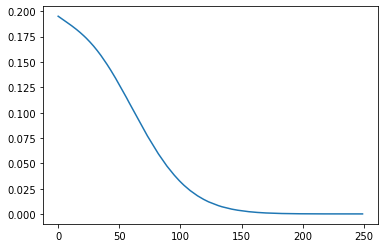

In [146]:
# checking cost distribution
plt.plot(history.epoch, history.history['loss'])

In [147]:
df['y_pred'] = recommender.predict([u_id, m_id])
df

32/32 [==============================] - 0s 891us/step


,movie_id,user_id,rating,average_rating,y_true,u_id,m_id,y_pred
485364,1247,84078,2.5,3.75,-1.25,288,193,-1.248882e+00
485141,1247,48461,5.0,3.75,1.25,170,193,1.249610e+00
602903,1500,1204,3.5,3.75,-0.25,1,231,-2.500241e-01
603676,1500,138066,4.0,3.75,0.25,455,231,2.489960e-01
989185,2710,68685,2.0,2.00,0.00,238,387,5.868811e-05
...,...,...,...,...,...,...,...,...
1494955,5782,170504,4.0,4.00,0.00,567,595,-1.276559e-06
1162319,3358,59164,4.0,4.00,0.00,207,459,3.156092e-07
1904655,122882,190449,4.0,4.00,0.00,631,768,1.348337e-06
1823672,63859,15209,2.5,2.50,0.00,58,729,1.653270e-05


In [152]:
u_id = 1

_df = df[['movie_id', 'm_id']].drop_duplicates()

movies = df['m_id'].unique().reshape(-1, 1)
users = np.tile(np.array([u_id]), len(movies)).reshape(-1, 1)

user_predictions = recommender.predict([users, movies])
_df['user_predictions'] = user_predictions
_df['u_id'] = u_id
_df = _df.sort_values(by='user_predictions', ascending=False) \
.merge(dfMovies, left_on='movie_id', right_index=True, how='left') \
.merge(df[['movie_id', 'u_id', 'rating']], on=['movie_id', 'u_id'], how='left') \
.merge(df[['movie_id', 'average_rating']].drop_duplicates(), on='movie_id', how='inner')

_df['user_predictions'] += _df['average_rating']
_df

25/25 [==============================] - 0s 997us/step


,movie_id,m_id,user_predictions,u_id,title,year,genres,rating,average_rating
0,2340,338,3.999211,1,meet joe black,1998,{romance},4.0,3.000000
1,648,111,2.817299,1,mission: impossible,1996,"{mystery, adventure, action, thriller}",NaN,2.250000
2,3175,440,3.557790,1,galaxy quest,1999,"{sci-fi, adventure, comedy}",NaN,3.000000
3,1271,202,3.203747,1,fried green tomatoes,1991,"{comedy, drama, crime}",NaN,2.750000
4,3246,445,4.561493,1,malcolm x,1992,{drama},NaN,4.166667
...,...,...,...,...,...,...,...,...,...
764,3505,473,3.136658,1,no way out,1987,"{mystery, drama, thriller}",NaN,3.500000
765,132,24,1.879177,1,jade,1995,{thriller},NaN,2.250000
766,6711,612,3.623556,1,lost in translation,2003,"{drama, romance, comedy}",NaN,4.000000
767,3081,430,2.566433,1,sleepy hollow,1999,"{mystery, romance, fantasy, horror}",NaN,3.000000


In [153]:
# other way to find similar movies - using keras lib

for i, la in enumerate(recommender.layers):
    print(i, la.name)

0 user_id_input
1 movie_id_input
2 user_vector_embedding
3 movie_vector_embedding
4 reshape_1
5 reshape_2
6 dot_1


In [154]:
movie_vectors = recommender.layers[3].get_weights()[0]
movie_vectors

array([[ 9.50464830e-02, -4.51169126e-02,  1.39468104e-01, ...,
        -2.97104809e-02,  2.02686712e-01,  1.69407517e-01],
       [ 1.22657344e-02,  1.19079361e-02, -3.91389849e-03, ...,
         5.33589069e-03, -3.62499035e-03,  2.63206428e-03],
       [-1.56814058e-04,  1.56527385e-04, -1.14930272e-02, ...,
        -7.57004786e-03,  3.90887493e-03,  3.73452972e-03],
       ...,
       [ 1.12052657e-01, -1.58722058e-01, -8.89596250e-03, ...,
        -1.11099534e-01,  1.60383180e-01,  1.65173694e-01],
       [-3.03342211e-04,  1.32023916e-03, -7.35795358e-04, ...,
        -1.43385609e-04,  4.10384673e-04,  1.21760159e-03],
       [-1.56415871e-03,  4.33051930e-04,  4.64333547e-03, ...,
        -1.43319514e-04,  1.29434001e-03, -3.77512304e-04]], dtype=float32)

In [155]:
movie_vectors = pd.DataFrame(movie_vectors, index=df['m_id'].unique())
movie_vectors = movie_vectors.merge(df[['m_id', 'movie_id']].drop_duplicates(), left_index=True, right_on='m_id') \
.set_index('movie_id') \
.drop(columns=['m_id']) \
.join(dfMovies['title']) \
.set_index('title')

movie_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
title,,,,,,,,,,,,,,,,,,,,
"graduate, the",0.095046,-0.045117,0.139468,0.140015,0.136600,0.129789,0.204648,-0.148298,-0.102428,-0.144239,0.015063,-0.029783,-0.092059,-0.222308,0.005117,-0.161465,0.164568,-0.029710,0.202687,0.169408
grosse pointe blank,0.012266,0.011908,-0.003914,0.001170,0.008395,0.005747,-0.009497,-0.006552,-0.000233,-0.002688,-0.013549,0.004394,-0.025571,-0.001986,0.000131,0.006727,0.011520,0.005336,-0.003625,0.002632
"blair witch project, the",-0.000157,0.000157,-0.011493,-0.002912,-0.000888,0.011261,-0.000639,0.000943,0.000362,0.003000,-0.010582,0.011117,0.000696,0.010779,-0.003205,-0.005003,0.003365,-0.007570,0.003909,0.003735
stuart little,0.001458,-0.005712,-0.001750,0.003309,-0.000262,-0.000106,0.000524,0.000543,-0.003654,-0.000088,-0.003210,0.000403,0.000052,0.000200,0.000306,-0.000382,0.001711,0.004246,0.000041,-0.004146
brassed off,0.000894,0.000292,0.001564,0.004167,0.001654,0.004271,-0.000835,-0.018106,-0.006094,0.000988,-0.004153,0.002946,-0.003088,0.001819,-0.015502,0.003333,-0.002941,0.007228,0.002278,-0.001812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"professional, the (le professionnel)",-0.020475,0.005343,-0.030653,0.013282,0.008256,0.002986,-0.006218,0.035989,-0.016444,-0.002631,-0.011195,0.008480,-0.003584,0.005001,-0.021541,0.005074,-0.013360,-0.007122,-0.001240,0.001688
defending your life,0.005334,-0.000200,0.000137,-0.000047,0.000089,0.001425,-0.002384,0.002526,-0.001666,-0.007392,-0.004916,-0.001823,-0.000570,-0.000290,0.000054,0.000201,0.000580,-0.000222,0.001147,-0.001525
mad max: fury road,0.112053,-0.158722,-0.008896,0.182943,-0.217403,-0.167352,-0.166679,0.117675,0.211058,0.187661,-0.194364,-0.202656,-0.189180,0.181017,-0.142977,-0.197101,0.014543,-0.111100,0.160383,0.165174


In [156]:
title = 'toy story'

movie_vector = movie_vectors.loc[title].to_numpy().reshape(1, -1)
scores = cosine_similarity(movie_vector, movie_vectors.to_numpy())
key = f'similarity_to {title}'
similarity = pd.DataFrame(scores.reshape(-1, 1), index=movie_vectors.index, columns=[key])
similarity.sort_values(by=key, ascending=False)

,similarity_to toy story
title,
toy story,1.000000
austin powers: international man of mystery,0.682886
king kong,0.595511
scream,0.590539
star trek,0.550452
...,...
that thing you do!,-0.559205
28 weeks later,-0.560504
"dude, where's my car?",-0.584688


# Recommendation engine - improvements, engine training

In [157]:
import numpy as np
import pandas as pd

from tensorflow import keras as ks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import pyplot as plt

In [158]:
dfMovies = pd.read_pickle('data/movies.pkl')
df = pd.read_pickle('data/user-movie-data-clean.pkl')
print(df.shape)
df.head()

(1905979, 3)


,movie_id,user_id,rating
0,1,17,5.0
1,1,106,2.5
2,1,373,4.0
3,1,670,5.0
4,1,707,4.0


In [159]:
mu = df[['movie_id', 'rating']].groupby(by='movie_id').mean().rename(columns={'rating': 'mean_rating'})
df = df.merge(mu, left_on='movie_id', right_index=True)
df['y_true'] = df['rating'] - df['mean_rating']
df

,movie_id,user_id,rating,mean_rating,y_true
0,1,17,5.0,3.885476,1.114524
1,1,106,2.5,3.885476,-1.385476
2,1,373,4.0,3.885476,0.114524
3,1,670,5.0,3.885476,1.114524
4,1,707,4.0,3.885476,0.114524
...,...,...,...,...,...
1905974,134853,244116,4.5,3.884740,0.615260
1905975,134853,244606,3.0,3.884740,-0.884740
1905976,134853,246481,4.0,3.884740,0.115260
1905977,134853,246533,2.5,3.884740,-1.384740


In [160]:
# create training and test sets

df_train, df_test = train_test_split(df, test_size=0.1)

df_train = df_train.reset_index(drop='index')
df_test = df_test.reset_index(drop='index')

user_encoder = LabelEncoder().fit(df['user_id'])
movie_encoder = LabelEncoder().fit(df['movie_id'])

df_train['u_id'] = user_encoder.transform(df_train['user_id'])
df_train['m_id'] = movie_encoder.transform(df_train['movie_id'])
df_test['u_id'] = user_encoder.transform(df_test['user_id'])
df_test['m_id'] = movie_encoder.transform(df_test['movie_id'])

df_train

,movie_id,user_id,rating,mean_rating,y_true,u_id,m_id
0,2671,49324,4.0,3.268138,0.731862,432,1100
1,34405,38939,4.5,3.741715,0.758285,336,1913
2,5574,134015,3.0,3.057023,-0.057023,1149,1668
3,8464,173941,4.0,3.567440,0.432560,1499,1835
4,349,23815,2.5,3.312214,-0.812214,222,194
...,...,...,...,...,...,...,...
1715376,1371,47160,3.5,2.931712,0.568288,403,647
1715377,2291,243755,3.5,3.703642,-0.203642,2071,959
1715378,6377,216818,4.0,3.864495,0.135505,1861,1727
1715379,3578,240694,4.0,3.738513,0.261487,2045,1380


In [168]:
# building the model

N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_1')(users_features)
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_2')(movies_features)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

In [169]:
ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [171]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['y_true'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['y_true'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.6753 - val_loss: 0.5910
Epoch 2/15
3351/3351 [==============================] - 5s 1ms/step - loss: 0.5567 - val_loss: 0.5482
Epoch 3/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.5143 - val_loss: 0.5328
Epoch 4/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4861 - val_loss: 0.5277
Epoch 5/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4655 - val_loss: 0.5282
Epoch 6/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4511 - val_loss: 0.5323
Epoch 7/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4416 - val_loss: 0.5369
Epoch 8/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4353 - val_loss: 0.5412
Epoch 9/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.4310 - val_loss: 0.5441
Epoch 10/15
3351/3351 [==============================] - 5s 2ms/step - loss: 0.427

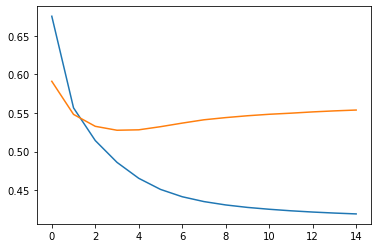

In [172]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [174]:
#Improvements 1st approach
N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_user_X')(users_features)
    
    users_bias = ks.layers.Embedding(
        n_users,
        1,
        name='user_bias_embedding'
    )(users_ids)
    
    users_bias = ks.layers.Reshape((1,), name='reshape_user_X0')(users_bias)
    
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_movies_X')(movies_features)
    
    movies_bias = ks.layers.Embedding(
        n_movies,
        1,
        name='movie_bias_embedding'
    )(movies_ids)
    
    movies_bias = ks.layers.Reshape((1,), name='reshape_movies_X0')(movies_bias)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    prediction = ks.layers.Add(name='adding_bias')([prediction, users_bias, movies_bias ])
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [175]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['y_true'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['y_true'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 7s 2ms/step - loss: 0.6597 - val_loss: 0.5799
Epoch 2/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.5443 - val_loss: 0.5401
Epoch 3/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.5024 - val_loss: 0.5286
Epoch 4/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4762 - val_loss: 0.5268
Epoch 5/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4578 - val_loss: 0.5306
Epoch 6/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4452 - val_loss: 0.5353
Epoch 7/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4369 - val_loss: 0.5407
Epoch 8/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4314 - val_loss: 0.5445
Epoch 9/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4274 - val_loss: 0.5480
Epoch 10/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.424

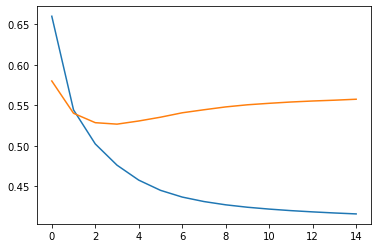

In [176]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [177]:
# Improvements - 2nd approach

N_FEATURES = 50
L2 = 1e-6
LR = 1e-3

def get_recommender(df_train):
    min_rating = 0.5
    max_rating = 5
    
    n_users = len(df_train['u_id'].unique())
    n_movies = len(df_train['m_id'].unique())
    
    users_ids = ks.layers.Input(shape=(1,), name='user_id_input')
    users_features = ks.layers.Embedding(
        n_users,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='user_vector_embedding'
    )(users_ids)
    users_features = ks.layers.Reshape((N_FEATURES,), name='reshape_user_X')(users_features)
    
    users_bias = ks.layers.Embedding(
        n_users,
        1,
        name='user_bias_embedding'
    )(users_ids)
    
    users_bias = ks.layers.Reshape((1,), name='reshape_user_X0')(users_bias)
    
    
    movies_ids = ks.layers.Input(shape=(1,), name='movie_id_input')
    movies_features = ks.layers.Embedding(
        n_movies,
        N_FEATURES,
        embeddings_initializer='he_normal',
        embeddings_regularizer=ks.regularizers.l2(L2),
        name='movie_vector_embedding'
    )(movies_ids)
    movies_features = ks.layers.Reshape((N_FEATURES,), name='reshape_movies_X')(movies_features)
    
    movies_bias = ks.layers.Embedding(
        n_movies,
        1,
        name='movie_bias_embedding'
    )(movies_ids)
    
    movies_bias = ks.layers.Reshape((1,), name='reshape_movies_X0')(movies_bias)
    
    prediction = ks.layers.Dot(axes=1)([users_features, movies_features])
    prediction = ks.layers.Add(name='adding_bias')([prediction, users_bias, movies_bias ])
    prediction = ks.layers.Activation(activation='sigmoid')(prediction)
    prediction = ks.layers.Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(prediction)
    
    
    model = ks.models.Model(inputs=[users_ids, movies_ids], outputs=prediction)
    model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(learning_rate=LR))
    
    return model

ks.backend.clear_session()

recommender = get_recommender(df_train)
recommender.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 movie_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_vector_embedding (Embeddi  (None, 1, 50)       105450      ['user_id_input[0][0]']          
 ng)                                                                                              
                                                                                                  
 movie_vector_embedding (Embedd  (None, 1, 50)       110850      ['movie_id_input[0][0]']     

In [178]:
u_id = df_train['u_id'].to_numpy().reshape(-1, 1)
m_id = df_train['m_id'].to_numpy().reshape(-1, 1)
y_true = df_train['rating'].to_numpy().reshape(-1, 1)

u_id_test = df_test['u_id'].to_numpy().reshape(-1, 1)
m_id_test = df_test['m_id'].to_numpy().reshape(-1, 1)
y_true_test = df_test['rating'].to_numpy().reshape(-1, 1)


recommender = get_recommender(df_train)

history = recommender.fit(
    x=[u_id, m_id],
    y=y_true,
    validation_data=[[u_id_test, m_id_test], y_true_test],
    batch_size=512,
    epochs=15,
    verbose=1
)

Epoch 1/15
3351/3351 [==============================] - 7s 2ms/step - loss: 0.7427 - val_loss: 0.5949
Epoch 2/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.5634 - val_loss: 0.5533
Epoch 3/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.5215 - val_loss: 0.5348
Epoch 4/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4917 - val_loss: 0.5277
Epoch 5/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4687 - val_loss: 0.5273
Epoch 6/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4518 - val_loss: 0.5315
Epoch 7/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4402 - val_loss: 0.5370
Epoch 8/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4322 - val_loss: 0.5421
Epoch 9/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.4266 - val_loss: 0.5468
Epoch 10/15
3351/3351 [==============================] - 6s 2ms/step - loss: 0.422

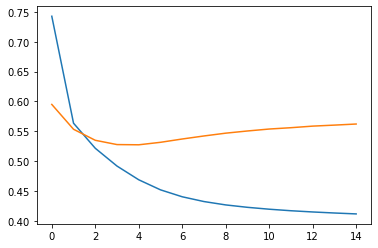

In [179]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [183]:
u_id = 1
_df = df_train.copy()
movies_watched = _df[_df['u_id'] == u_id][['m_id', 'movie_id']].drop_duplicates().set_index('movie_id')
movies_watched_ids = movies_watched['m_id'].to_numpy()
user_id_as_array = np.array([u_id] * len(movies_watched_ids))

movies_watched['estimated_rating'] = recommender.predict([
    user_id_as_array,
    movies_watched_ids
])

18/18 [==============================] - 0s 880us/step


In [185]:
movies_watched['u_id'] = u_id
movies_watched.merge(_df[['movie_id', 'm_id', 'u_id', 'rating']].reset_index(), on=['m_id', 'u_id']) \
.merge(dfMovies, left_on='movie_id', right_index=True) \
.sort_values(by='estimated_rating', ascending=False)[['estimated_rating', 'rating', 'title', 'year', 'genres']]

,estimated_rating,rating,title,year,genres
479,4.764672,3.5,pulp fiction,1994,"{comedy, drama, thriller, crime}"
31,4.671620,5.0,2001: a space odyssey,1968,"{sci-fi, drama, adventure}"
445,4.552826,4.5,schindler's list,1993,"{war, drama}"
314,4.552137,4.5,fight club,1999,"{crime, drama, action, thriller}"
132,4.539582,4.5,"shawshank redemption, the",1994,"{drama, crime}"
...,...,...,...,...,...
307,1.376932,0.5,avp: alien vs. predator,2004,"{sci-fi, horror, action, thriller}"
395,1.376715,1.0,police academy 6: city under siege,1989,"{comedy, crime}"
368,1.305651,0.5,"stepford wives, the",2004,"{comedy, fantasy, thriller}"
245,1.296909,1.0,police academy 5: assignment: miami beach,1988,"{comedy, crime}"


In [187]:
movies_not_watched = _df[~_df['movie_id'].isin(movies_watched.index.tolist())][['m_id','movie_id']].drop_duplicates() \
.set_index('movie_id')

movies_not_watched_ids = movies_not_watched['m_id'].to_numpy()
user_id_as_array = np.array([u_id] * len(movies_not_watched_ids))
movies_not_watched['estimated_rating'] = recommender.predict([
    user_id_as_array,
    movies_not_watched_ids
])

movies_not_watched.join(dfMovies) \
.sort_values(by='estimated_rating', ascending=False)[['estimated_rating', 'title', 'year', 'genres']]

53/53 [==============================] - 0s 971us/step


,estimated_rating,title,year,genres
movie_id,,,,
1199,4.550563,brazil,1985,"{sci-fi, fantasy}"
750,4.533614,dr. strangelove or: how i learned to stop worr...,1964,"{war, comedy}"
122882,4.529819,mad max: fury road,2015,"{sci-fi, adventure, action, thriller}"
2028,4.384698,saving private ryan,1998,"{war, drama, action}"
1204,4.368695,lawrence of arabia,1962,"{war, drama, adventure}"
...,...,...,...,...
1760,1.087571,spice world,1997,{comedy}
3646,1.054785,big momma's house,2000,{comedy}
737,1.028723,barb wire,1996,"{sci-fi, action}"


In [188]:
for i, la in enumerate(recommender.layers):
    print(i, la.name)

0 user_id_input
1 movie_id_input
2 user_vector_embedding
3 movie_vector_embedding
4 reshape_user_X
5 reshape_movies_X
6 user_bias_embedding
7 movie_bias_embedding
8 dot_1
9 reshape_user_X0
10 reshape_movies_X0
11 adding_bias
12 activation_1
13 lambda_1


In [190]:
movie_vectors = recommender.layers[3].get_weights()[0]
movie_vectors.shape

(2217, 50)

In [191]:
pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.330616,-0.556759,-0.300868,-0.250787,-0.312219,-0.134665,-0.095205,-0.212181,-0.520525,0.708249,...,-0.017035,0.592734,0.312717,0.053609,0.019245,0.040226,0.308361,-0.108308,0.201023,0.113628
1,0.323371,-0.319495,-0.146781,0.007736,-0.026489,-0.189220,-0.125399,-0.368864,0.123745,-0.177640,...,-0.200904,-0.116169,-0.131184,-0.009356,-0.182686,-0.197260,0.129098,0.120195,0.225295,-0.234622
2,0.005762,0.126435,0.145544,-0.719177,0.012539,-0.325472,0.162061,0.018769,0.062717,0.206020,...,-0.158200,-0.376397,0.162769,-0.285974,0.169039,-0.142026,0.464792,0.073322,0.642338,0.177983
3,-0.020872,0.305035,-0.123726,0.430730,0.146179,-0.131675,0.270605,-0.232677,-0.195505,-0.227584,...,-0.039484,-0.171638,0.288277,-0.362990,-0.132208,0.392144,0.088100,0.576031,0.103595,-0.435702
4,0.230523,0.050998,-0.067136,-0.047481,0.048980,-0.339252,-0.085289,0.019209,0.252629,0.139753,...,-0.334661,0.048394,0.179255,-0.427057,-0.037679,-0.392372,0.280917,0.314651,0.196541,-0.248224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,0.180401,-0.296100,-0.095778,0.214222,-0.237432,0.327602,0.323141,0.097433,-0.564767,0.400882,...,0.190026,0.313441,0.203537,-0.365021,0.207216,0.371123,-0.015754,-0.199712,-0.494139,0.640685
2213,-0.164280,-0.530141,-0.358108,-0.180203,-0.101698,0.114015,0.022877,0.287249,-0.202520,0.165814,...,0.383932,0.349114,0.657555,-0.498762,0.378026,0.210829,-0.381900,0.351843,-0.227963,-0.218934
2214,0.105221,-0.548868,0.087270,-0.436664,-0.098343,0.009709,-0.311877,0.043278,-0.337195,0.137372,...,-0.024649,-0.281046,-0.321130,-0.190417,0.348764,-0.369355,-0.213697,0.176022,-0.412704,-0.123819
2215,-0.040746,-0.635652,-0.240966,-0.268888,-0.427141,0.289059,-0.012868,-0.191326,-0.326415,-0.057208,...,0.389174,0.133451,-0.047369,-0.307735,0.373643,-0.085476,-0.446373,0.081345,-0.209503,-0.110430


In [193]:
_df = df.copy()

df_movie_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))
_df['m_id'] = movie_encoder.transform(_df['movie_id'])
_df = _df.set_index('movie_id')
_df = _df[['m_id']].drop_duplicates()
_df = _df.join(dfMovies).set_index('m_id')

_df

,title,year,genres
m_id,,,
0,toy story,1995,"{animation, comedy, adventure, fantasy, children}"
1,jumanji,1995,"{adventure, children, fantasy}"
2,grumpier old men,1995,"{romance, comedy}"
3,waiting to exhale,1995,"{drama, romance, comedy}"
4,father of the bride part ii,1995,{comedy}
...,...,...,...
2212,mad max: fury road,2015,"{sci-fi, adventure, action, thriller}"
2213,star wars: episode vii - the force awakens,2015,"{adventure, sci-fi, fantasy, action}"
2214,avengers: age of ultron,2015,"{sci-fi, adventure, action}"


In [194]:
df_movies_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))
title_pick = 'toy story'
pick_id = _df[_df['title'] == title_pick]
pick_id.index.values

array([0], dtype=int64)

In [195]:
df_movies_vectors.loc[pick_id.index.values]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.330616,-0.556759,-0.300868,-0.250787,-0.312219,-0.134665,-0.095205,-0.212181,-0.520525,0.708249,...,-0.017035,0.592734,0.312717,0.053609,0.019245,0.040226,0.308361,-0.108308,0.201023,0.113628


In [196]:
cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])

array([[1.        ],
       [0.2995918 ],
       [0.06717505],
       ...,
       [0.18183446],
       [0.2120927 ],
       [0.49648002]], dtype=float32)

In [197]:
_df[f'similarity to: {title_pick}'] = cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])

In [198]:
_df.sort_values(by=f'similarity to: {title_pick}', ascending=False)

,title,year,genres,similarity to: toy story
m_id,,,,
0,toy story,1995,"{animation, comedy, adventure, fantasy, children}",1.000000
1254,toy story 2,1999,"{animation, comedy, adventure, fantasy, children}",0.904130
1727,finding nemo,2003,"{animation, children, adventure, comedy}",0.872331
1593,"monsters, inc.",2001,"{animation, comedy, adventure, fantasy, children}",0.791056
986,"bug's life, a",1998,"{animation, children, adventure, comedy}",0.764754
...,...,...,...,...
233,boxing helena,1993,"{mystery, drama, romance, thriller}",-0.349459
377,chain reaction,1996,"{adventure, action, thriller}",-0.354624
438,last man standing,1996,"{crime, drama, action, thriller}",-0.374082


In [199]:
df_movies_vectors = pd.DataFrame(movie_vectors, index=range(m_id.min(), m_id.max() + 1))

title_pick = 'star wars: episode iv - a new hope'
pick_id = _df[_df['title'] == title_pick]
pick_id.index.values

_df[f'similarity to: {title_pick}'] = cosine_similarity(movie_vectors, movie_vectors[pick_id.index.values])
_df.sort_values(by=f'similarity to: {title_pick}', ascending=False)

,title,year,genres,similarity to: toy story,similarity to: star wars: episode iv - a new hope
m_id,,,,,
149,star wars: episode iv - a new hope,1977,"{sci-fi, adventure, action}",0.304643,1.000000
520,star wars: episode v - the empire strikes back,1980,"{sci-fi, adventure, action}",0.350800,0.945930
532,star wars: episode vi - return of the jedi,1983,"{sci-fi, adventure, action}",0.235965,0.873511
522,raiders of the lost ark (indiana jones and the...,1981,"{adventure, action}",0.482641,0.778836
1903,star wars: episode iii - revenge of the sith,2005,"{sci-fi, adventure, action}",0.234311,0.572694
...,...,...,...,...,...
115,something to talk about,1995,"{drama, romance, comedy}",-0.040007,-0.371506
1739,bad boys ii,2003,"{comedy, thriller, action, crime}",-0.063802,-0.374502
1162,"astronaut's wife, the",1999,"{sci-fi, horror, thriller}",-0.443488,-0.421565
